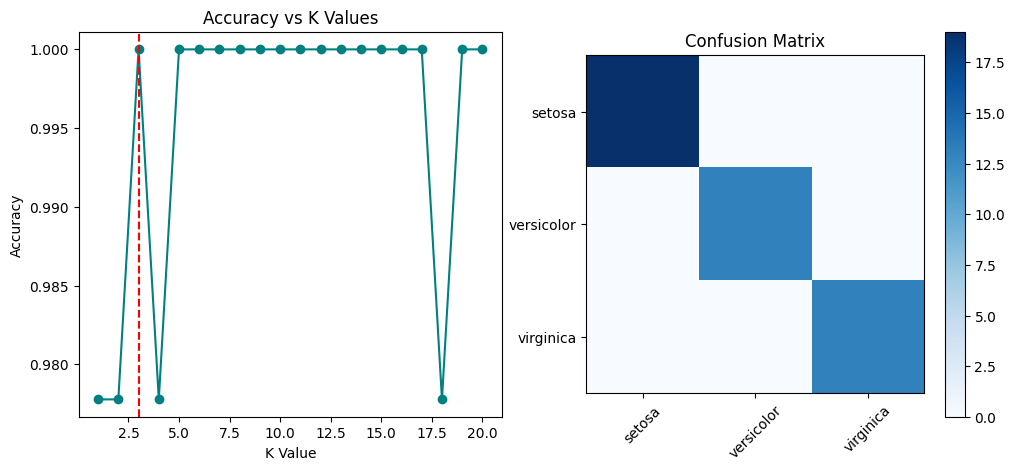

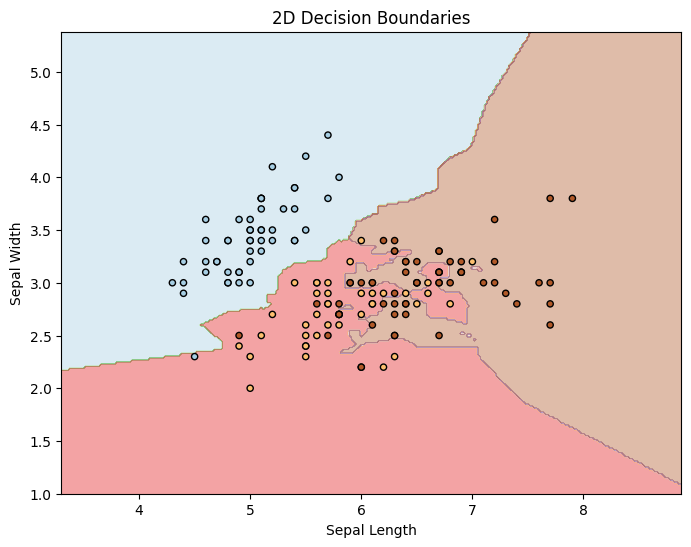

Best K: 3
Test Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)

best_k = k_values[np.argmax(accuracies)]
final_model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=best_k))
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(k_values, accuracies, marker='o', color='teal')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K Values')
plt.axvline(best_k, color='r', linestyle='--')

plt.subplot(1,2,2)
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)

X_2d = X[['sepal length (cm)', 'sepal width (cm)']].values
y_2d = y.values

x_min, x_max = X_2d[:,0].min()-1, X_2d[:,0].max()+1
y_min, y_max = X_2d[:,1].min()-1, X_2d[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

model_2d = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=best_k))
model_2d.fit(X_2d, y_2d)
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Paired')
plt.scatter(X_2d[:,0], X_2d[:,1], c=y_2d, s=20, edgecolor='k', cmap='Paired')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('2D Decision Boundaries')
plt.show()

print(f"Best K: {best_k}\nTest Accuracy: {accuracies[best_k-1]:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
